In [4]:
import numpy as np
import field_velocity
import matplotlib.pyplot as plt 
from mpl_toolkits.axes_grid1 import make_axes_locatable
import bem_two_objects as bem

In [ ]:



def generate_velocity_field(mode_array, max_length):
    # Coordinates
    N_points = 150
    z = np.linspace(-max_length, max_length, N_points)
    y = np.linspace(-max_length, max_length, N_points)
    Y, Z = np.meshgrid(y, z)
    R = np.sqrt(Z**2 + Y**2)
    Theta = np.arctan(Y/Z)
    phi = np.pi / 2

    # Loop through each 
    u_y = np.empty((N_points, N_points))
    u_z = np.empty_like(u_y)
    for i in range(N_points):
        for j in range(N_points):
            _, u_y_val, u_z_val = field_velocity.field_cartesian(max_mode, R[i,j], np.array([Theta[i,j]]), 
                                                                 np.array([phi]), a, mode_array)
            #print(u_y_val)
            u_y[i, j] = u_y_val
            u_z[i, j] = u_z_val

    # Remove velocity values inside squirmer
    #R = R.flatten()
    u_y[np.where(R<a)] = 0
    u_z[np.where(R<a)] = 0
    velocity_magnitude = np.sqrt(u_y ** 2 + u_z ** 2)
    return Y, Z, u_y, u_z, velocity_magnitude


def generate_velocity_field_xy(mode_array, max_length):
    # Coordinates
    N_points = 100
    x = np.linspace(-max_length, max_length, N_points)
    y = np.linspace(-max_length, max_length, N_points)
    X, Y = np.meshgrid(x, y)
    R = np.sqrt(X**2 + Y**2)
    theta = np.pi / 2
    Phi = np.arctan2(Y, X)

    # Loop through each 
    u_x = np.empty((N_points, N_points))
    u_y = np.empty_like(u_x)
    for i in range(N_points):
        for j in range(N_points):
            u_x_val, u_y_val, _ = field_velocity.field_cartesian(max_mode, R[i,j], np.array([theta]), 
                                                                 np.array([Phi[i, j]]), a, mode_array)
            #print(u_y_val)
            u_x[i, j] = u_x_val
            u_y[i, j] = u_y_val

    # Remove velocity values inside squirmer
    #R = R.flatten()
    u_x[np.where(R<a)] = 0
    u_y[np.where(R<a)] = 0
    velocity_magnitude = np.sqrt(u_x ** 2 + u_y ** 2)
    return X, Y, u_x, u_y, velocity_magnitude




def plot_velocity_field(mode_array_list, max_length, title_list, plane):
    # NOTE SØRG FOR AT ALLES FARVER SKALERER ENS!!!!
    def fill_axis(axis, mode_array, title):
        if plane == "xy":
            x1, x2, u_1, u_2, velocity_magnitude = generate_velocity_field_xy(mode_array, max_length)
            xlabel = r"$x/a$"
            ylabel = r"$y/a$"
        else:
            x1, x2, u_1, u_2, velocity_magnitude = generate_velocity_field(mode_array, max_length)
            xlabel = r"$y/a$"
            ylabel = r"$z/a$"

        axis.set(xlim=(-max_length, max_length), ylim=(-max_length, max_length))
        axis.set_title(title, fontsize=13)
        axis.set_xlabel(xlabel, fontsize=13)
        axis.set_ylabel(ylabel, fontsize=13)

        axis.streamplot(x1, x2, u_1, u_2, density=1.264, color="k")
        contour = axis.contourf(x1, x2, velocity_magnitude, vmin=0, vmax=1,levels=16, cmap='Blues')
        circle1 = plt.Circle((0, 0), a, facecolor="red", edgecolor="k") #gainsboro
        axis.add_patch(circle1)
        return contour


    # -- Plot counterf and streamplot -- 
    fig, ax = plt.subplots(nrows=1, ncols=4, dpi=200, figsize=(22, 5))
    ax0 = ax[0]
    ax1 = ax[1]
    ax2 = ax[2]
    ax3 = ax[3]

    # Plot on each axis  
    fill_axis(ax0, mode_array_list[0], title_list[0])
    fill_axis(ax1, mode_array_list[1], title_list[1])
    fill_axis(ax2, mode_array_list[2], title_list[2])
    contour_ax3 = fill_axis(ax3, mode_array_list[3], title_list[3])
    
    """ # Remove unnecessary ticks
    ax0.set(ylabel="z/a")
    ax1.set(ylabel="z/a")
    ax2.set(ylabel="z/a")
    ax3.set(ylabel="z/a")
    
    ax0.set(xlabel="y/a")
    ax1.set(xlabel="y/a")
    ax2.set(xlabel="y/a")
    ax3.set(xlabel="y/a")
    """
    # Colorbars  
    divider = make_axes_locatable(ax3)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar_ax01 = plt.colorbar(contour_ax3, cax=cax)
    cbar_ax01.set_label("Velocity strength", fontsize=12)
    
    #cbar_ax01 = plt.colorbar(contour_ax01)
    #cbar_ax11 = plt.colorbar(contour_ax11)
    plt.savefig("test.png")
    plt.show()
    
    
# Parameters
a = 1
max_length = 2  # Points radius
max_mode = 4
B = np.zeros((max_mode+1, max_mode+1))
B_tilde = np.zeros_like(B)
C = np.zeros_like(B)
C_tilde = np.zeros_like(B)

# Mode array 1
B[0, 1] = 1.2
mode_array_B01 = np.array([B, B_tilde, C, C_tilde])
B[0, 1] = 0

# Mode array 2
B_tilde[1, 1] = 1.25
mode_array_Bt11 = np.array([B, B_tilde, C, C_tilde])
B_tilde[1, 1] = 0

# More array 3
B[0, 2] = 1.25
mode_array_B11 = np.array([B, B_tilde, C, C_tilde])
B[0, 2] = 0

# More array 4
B[0, 3] = 1.25
mode_array_C11 = np.array([B, B_tilde, C, C_tilde])
B[0, 3] = 0


mode_array_list = [mode_array_B01, mode_array_Bt11, mode_array_B11, mode_array_C11]
title_list = [r"$B_{01}$", r"$\tilde{B}_{11}$", r"$B_{02}$", r"$B_{03}$"]#[r"$B_{01}$", r"$\tilde{B}_{11}$", r"$B_{11}$", r"$C_{12}$"]

plot_velocity_field(mode_array_list, 3, title_list, plane="zy")

In [20]:
def test_2obj_point(squirmer_radius, radius_obj2, x1_center, x2_center,B, B_tilde, C, C_tilde):
    # Choose parameters
    eps = 0.1
    viscosity = 1
    N1 = 300
    max_mode = 3
    
    #B[1,1] = 1
    # Force
    force_with_condition, x1_surface, x2_surface = bem.force_surface_two_objects(N1, max_mode, squirmer_radius, radius_obj2, x1_center, x2_center, np.array([B, B_tilde, C, C_tilde]), eps, viscosity, lab_frame=True, return_points=True)
    #translation = force_with_condition[-12: -6]
    #rotation = force_with_condition[-6:]
    force = force_with_condition[:-12]  # Remove translation and rotation

    # Evaluation points
    N_eval = 150
    evaluation_points = np.linspace(-5, 5, N_eval)
    X, Y = np.meshgrid(evaluation_points, evaluation_points)
    x_e = X.ravel()
    y_e = Y.ravel()
    z_e = 0 * X.ravel()
    x_e_stack = np.stack((x_e, y_e, z_e)).T

    # Oseen tensor in evaluation points
    dA = 4 * np.pi * squirmer_radius ** 2 / N1
    A_e = bem.oseen_tensor_two_objects(x1_surface, x2_surface, x_e_stack, x1_center, x2_center, dA, eps, viscosity)

    # Velocity
    v_e = A_e @ force
    v_e = np.reshape(v_e, (len(v_e)//3, 3), order="F")

    # Remove values inside squirmer
    r2_obj1 = np.sum((x_e_stack-x1_center)**2, axis=1)
    r2_obj2 = np.sum((x_e_stack-x2_center)**2, axis=1)
    v_e[r2_obj1 < squirmer_radius ** 2, :] = 0
    v_e[r2_obj2 < radius_obj2 ** 2, :] = 0
    velocity_magnitude = np.sqrt(v_e[:, 0].reshape((N_eval, N_eval))**2 + v_e[:, 1].reshape((N_eval, N_eval))**2)
    return X, Y, v_e[:, 0].reshape((N_eval, N_eval)), v_e[:, 1].reshape((N_eval, N_eval)), velocity_magnitude


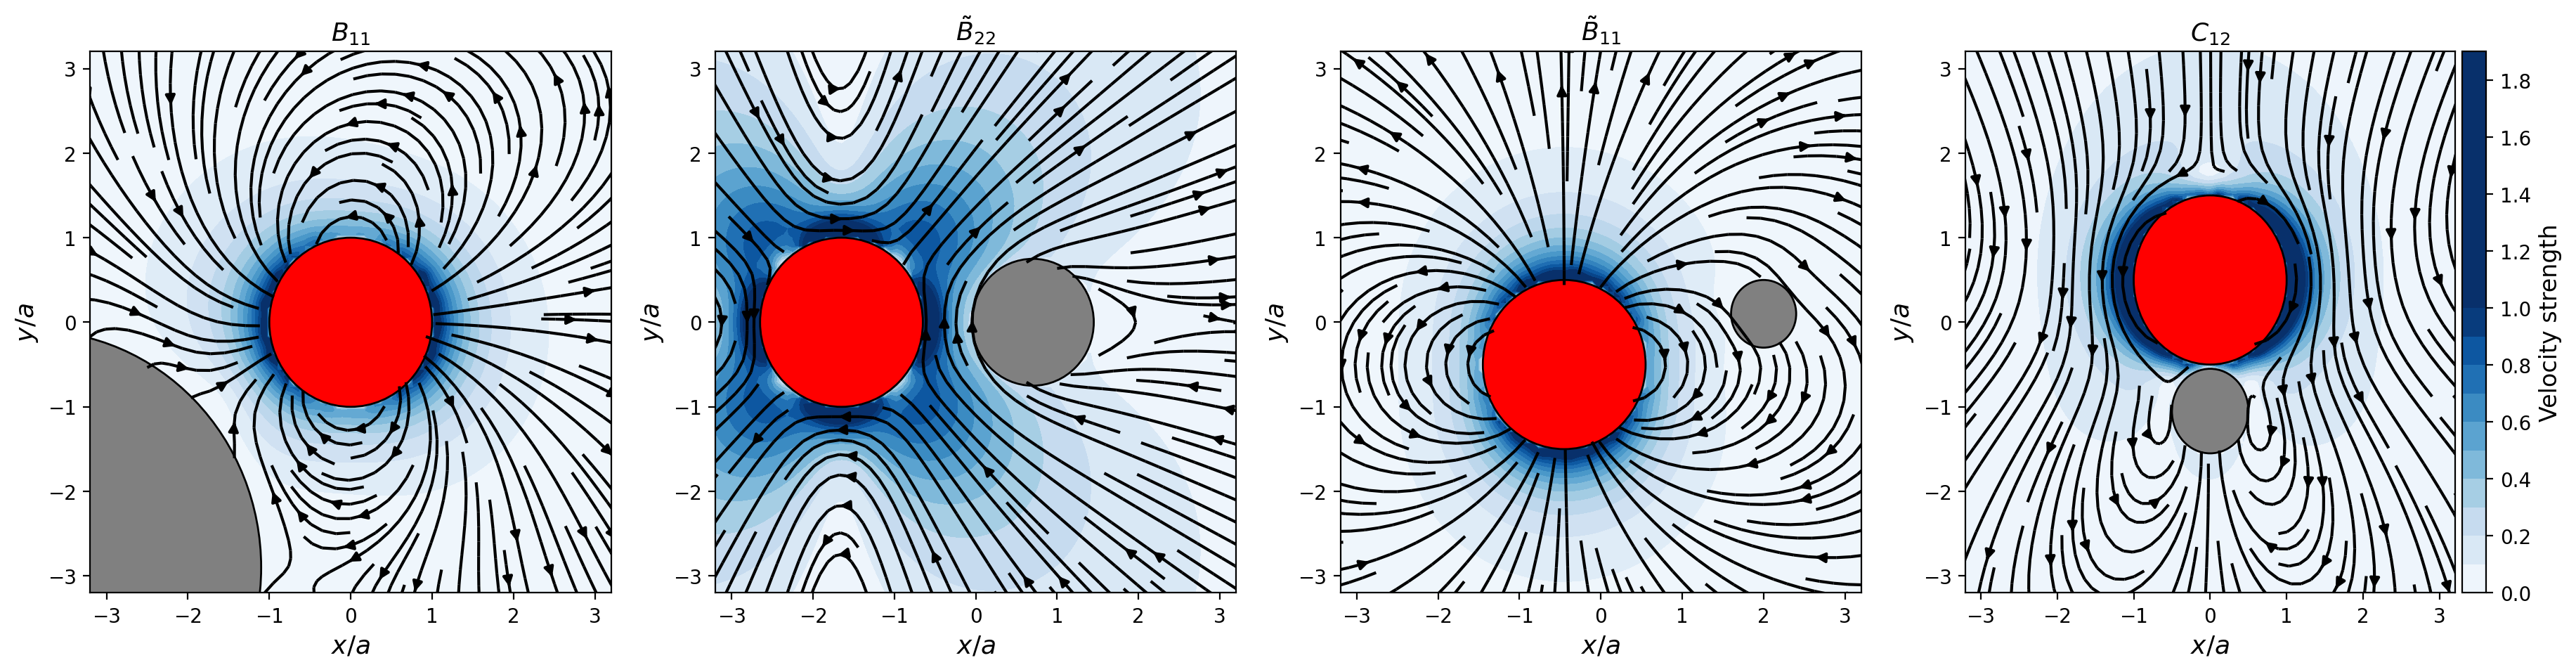

In [21]:
def plot_velocity_field(mode_array_list, max_length, title_list, plane, krav, pos1, pos2):
    # NOTE SØRG FOR AT ALLES FARVER SKALERER ENS!!!!
    def fill_axis(axis, mode_array, title, krav,  pos1, pos2):
        squirmer_radius, radius_obj2= krav
        x1_center =  pos1
        x2_center = pos2
        B, B_tilde, C, C_tilde = mode_array
        if plane == "xy":
            x1, x2, u_1, u_2, velocity_magnitude = test_2obj_point(squirmer_radius, radius_obj2, x1_center, x2_center, B, B_tilde, C, C_tilde)
            xlabel = r"$x/a$"
            ylabel = r"$y/a$"
        else:
            x1, x2, u_1, u_2, velocity_magnitude = test_2obj_point(squirmer_radius, radius_obj2, x1_center, x2_center, B, B_tilde, C, C_tilde)
            xlabel = "y"
            ylabel = "z"

        axis.set(xlim=(-max_length, max_length), ylim=(-max_length, max_length), title=title, xlabel="y")
        axis.set_title(title, fontsize=13)
        axis.set_xlabel(xlabel, fontsize=13)
        axis.set_ylabel(ylabel, fontsize=13)
        axis.streamplot(x1, x2, u_1, u_2, density=1.9, color="k")
        
        contour = axis.contourf(x1, x2, velocity_magnitude, vmin=0, vmax=1,levels=20, cmap='Blues')
        circle1 = plt.Circle((x1_center), a, facecolor="red", edgecolor="k")
        circle2 = plt.Circle((x2_center), radius_obj2, facecolor="grey", edgecolor="k")

        axis.add_patch(circle1)
        axis.add_patch(circle2)
        return contour


    # -- Plot counterf and streamplot -- 
    fig, ax = plt.subplots(nrows=1, ncols=4, dpi=200, figsize=(22, 5))
    ax0 = ax[0]
    ax1 = ax[1]
    ax2 = ax[2]
    ax3 = ax[3]

    # Plot on each axis  
    fill_axis(ax0, mode_array_list[0], title_list[0], krav[0], pos1[0], pos2[0])
    fill_axis(ax1, mode_array_list[1], title_list[1], krav[1],pos1[1], pos2[1])
    fill_axis(ax2, mode_array_list[2], title_list[2], krav[2],pos1[2], pos2[2])
    contour_ax3 = fill_axis(ax3, mode_array_list[3], title_list[3], krav[3],pos1[3], pos2[3])
    
    """# Remove unnecessary ticks
    ax0.set(ylabel=r"$y/a$", fontsize=13)
    ax1.set(ylabel=r"$y/a$", fontsize=13)
    ax2.set(ylabel=r"$y/a$", fontsize=13)
    ax3.set(ylabel=r"$y/a$", fontsize=13)
    
    ax0.set(xlabel=r"$x/a$", fontsize=13)
    ax1.set(xlabel=r"$x/a$", fontsize=13)
    ax2.set(xlabel=r"$x/a$", fontsize=13)
    ax3.set(xlabel=r"$x/a$", fontsize=13)"""
    
    # Colorbars  
    divider = make_axes_locatable(ax3)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar_ax01 = plt.colorbar(contour_ax3, cax=cax)
    cbar_ax01.set_label("Velocity strength", fontsize=12)
    
    #cbar_ax01 = plt.colorbar(contour_ax01)
    #cbar_ax11 = plt.colorbar(contour_ax11)
    plt.savefig("test.png")
    plt.show()
    
    
# Parameters
a = 1
max_length = 2  # Points radius
max_mode = 4
B = np.zeros((max_mode+1, max_mode+1))
B_tilde = np.zeros_like(B)
C = np.zeros_like(B)
C_tilde = np.zeros_like(B)

 

# Mode array 1
B[1, 1] = 1
mode_array_B01 = np.array([B, B_tilde, C, C_tilde])
squirmer_radius = 1
radius_obj2 = 2.8
x1_center1 = np.array([0, 0, 0])  # NOTE feltet afhænger af hvor man sætter squirmer!
x2_center1 = np.array([-3.9,-2.9, 0])
krav1 = np.array([squirmer_radius, radius_obj2 ])
B[1, 1] = 0

# Mode array 2
B_tilde[2, 2] = 0.3
mode_array_Bt11 = np.array([B, B_tilde, C, C_tilde])
squirmer_radius = 1
radius_obj2 = 0.75
x1_center2 = np.array([-1.65,0, 0])  # NOTE feltet afhænger af hvor man sætter squirmer!
x2_center2 = np.array([0.7, 0, 0])
krav2 = np.array([squirmer_radius, radius_obj2] )
B_tilde[2,2] = 0

# More array 3
B_tilde[1,1] = 1
mode_array_B11 = np.array([B, B_tilde, C, C_tilde])
squirmer_radius = 1
radius_obj2 = 0.4
x1_center3 = np.array([-0.45, -0.5, 0])  # NOTE feltet afhænger af hvor man sætter squirmer!
x2_center3 = np.array([2,0.1, 0])
krav3 = np.array([squirmer_radius, radius_obj2])
B_tilde[1,1] = 0

# More array 4
C[1,2] = 1
mode_array_C11 = np.array([B, B_tilde, C, C_tilde])
squirmer_radius = 1
radius_obj2 = 0.5
x1_center4 = np.array([0, 0.5, 0])  # NOTE feltet afhænger af hvor man sætter squirmer!
x2_center4 = np.array([0, -1.05, 0])
krav4 = np.array([squirmer_radius, radius_obj2] )
C[1,2] = 0


"""
B = np.zeros((max_mode+1, max_mode+1))
B_tilde = np.zeros_like(B)
C = np.zeros_like(B)
C_tilde = np.zeros_like(B)
    #B_tilde[2, 2] = -1
    B_tilde[2,2]=-0.5
"""
mode_array_list = [mode_array_B01, mode_array_Bt11, mode_array_B11, mode_array_C11]
title_list = [r"$B_{11}$", r"$\tilde{B}_{22}$", r"$\tilde{B}_{11}$", r"$C_{12}$"]#[r"$B_{01}$", r"$\tilde{B}_{11}$", r"$B_{11}$", r"$C_{12}$"]
krav_list = [krav1, krav2, krav3, krav4]
pos1_list = [x1_center1, x1_center2, x1_center3, x1_center4]
pos2_list = [x2_center1, x2_center2, x2_center3, x2_center4]


plot_velocity_field(mode_array_list=mode_array_list, 
                    max_length=3.2, title_list=title_list, plane="xy", krav=krav_list, pos1=pos1_list, pos2=pos2_list)

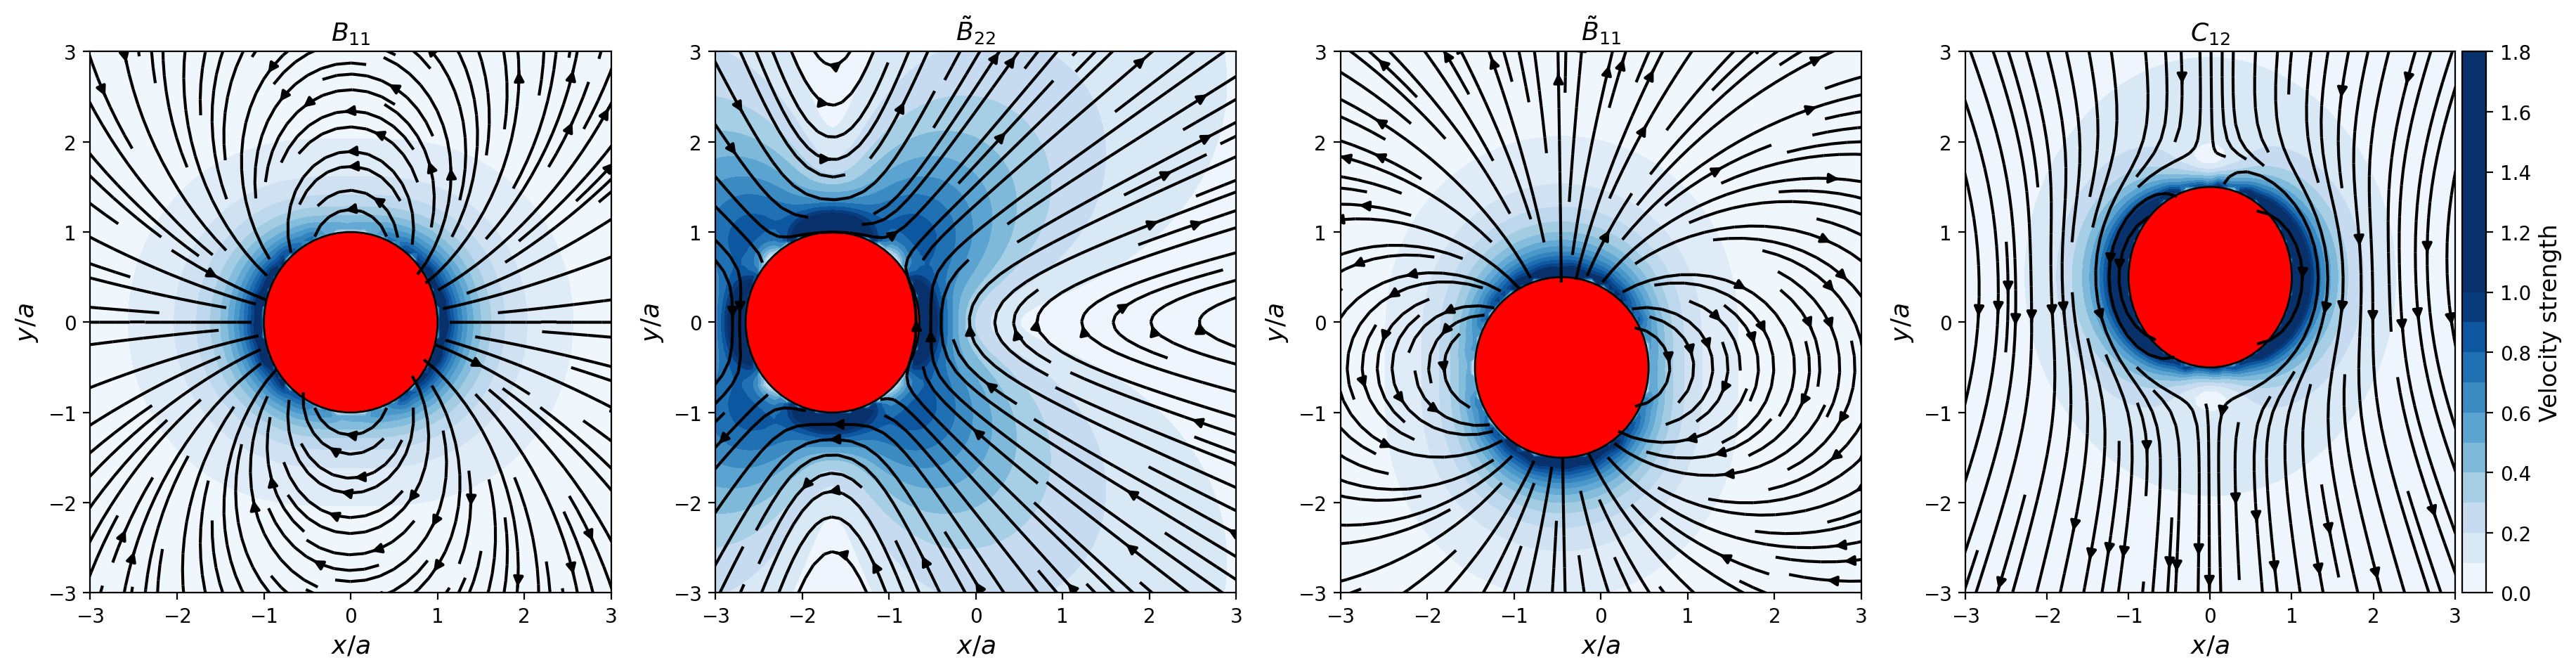

In [22]:
max_mode = 4
B = np.zeros((max_mode+1, max_mode+1))
B_tilde = np.zeros_like(B)
C = np.zeros_like(B)
C_tilde = np.zeros_like(B)

 

# Mode array 1
B[1, 1] = 1
mode_array_B01 = np.array([B, B_tilde, C, C_tilde])
squirmer_radius = 1
radius_obj2 = 0.1
x1_center1 = np.array([0, 0, 0])  # NOTE feltet afhænger af hvor man sætter squirmer!
x2_center1 = np.array([90, 90, 0])
krav1 = np.array([squirmer_radius, radius_obj2 ])
B[1, 1] = 0

# Mode array 2
B_tilde[2, 2] = 0.3
mode_array_Bt11 = np.array([B, B_tilde, C, C_tilde])
squirmer_radius = 1
radius_obj2 = 0.1
x1_center2 = np.array([-1.65,0, 0])  # NOTE feltet afhænger af hvor man sætter squirmer!
x2_center2 = np.array([90, 90, 0])
krav2 = np.array([squirmer_radius, radius_obj2] )
B_tilde[2,2] = 0

# More array 3
B_tilde[1,1] = 1
mode_array_B11 = np.array([B, B_tilde, C, C_tilde])
squirmer_radius = 1
radius_obj2 = 0.1
x1_center3 = np.array([-0.45, -0.5, 0])  # NOTE feltet afhænger af hvor man sætter squirmer!
x2_center3 = np.array([90, 90, 0])
krav3 = np.array([squirmer_radius, radius_obj2])
B_tilde[1,1] = 0

# More array 4
C[1,2] = 1
mode_array_C11 = np.array([B, B_tilde, C, C_tilde])
squirmer_radius = 1
radius_obj2 = 0.1
x1_center4 = np.array([0, 0.5, 0])  # NOTE feltet afhænger af hvor man sætter squirmer!
x2_center4 = np.array([90, 90, 0])
krav4 = np.array([squirmer_radius, radius_obj2] )
C[1,2] = 0


"""
B = np.zeros((max_mode+1, max_mode+1))
B_tilde = np.zeros_like(B)
C = np.zeros_like(B)
C_tilde = np.zeros_like(B)
    #B_tilde[2, 2] = -1
    B_tilde[2,2]=-0.5
"""
mode_array_list = [mode_array_B01, mode_array_Bt11, mode_array_B11, mode_array_C11]
title_list = [r"$B_{11}$", r"$\tilde{B}_{22}$", r"$\tilde{B}_{11}$", r"$C_{12}$"]#[r"$B_{01}$", r"$\tilde{B}_{11}$", r"$B_{11}$", r"$C_{12}$"]
krav_list = [krav1, krav2, krav3, krav4]
pos1_list = [x1_center1, x1_center2, x1_center3, x1_center4]
pos2_list = [x2_center1, x2_center2, x2_center3, x2_center4]


plot_velocity_field(mode_array_list=mode_array_list, 
                    max_length=3, title_list=title_list, plane="xy", krav=krav_list, pos1=pos1_list, pos2=pos2_list)